In [1]:
%matplotlib inline
import geopandas as gpd
from requests import Request
from owslib.wfs import WebFeatureService
import urllib.parse


In [2]:
url = "https://firemap.sdsc.edu/geoserver/WIFIRE/ows?service=WFS&version=1.0.0&request=GetFeature&typeName=WIFIRE%3Aview_historical_fires&maxFeatures={}&cql_filter={}&outputFormat=application%2Fjson"

In [3]:
# Read data from URL
max_data_size = 10000
cql_filter="perimeter_timestamp>2006-12-31 AND perimeter_timestamp<2007-12-31"
print(url.format(max_data_size,urllib.parse.quote(cql_filter)))
data = gpd.read_file(url.format(max_data_size,urllib.parse.quote(cql_filter)))

https://firemap.sdsc.edu/geoserver/WIFIRE/ows?service=WFS&version=1.0.0&request=GetFeature&typeName=WIFIRE%3Aview_historical_fires&maxFeatures=10000&cql_filter=perimeter_timestamp%3E2006-12-31%20AND%20perimeter_timestamp%3C2007-12-31&outputFormat=application%2Fjson


In [10]:
data.head()

,id,year,fire_name,agency,acres,mapmethod,inciwebid,alarm_date,cont_date,comments,complex_name,perimeter_timestamp,cause,geometry
0,view_historical_fires.fid--28c4e4c5_17020fcf19...,2007,Cottonwood Creek,State agency,8113.976,None,None,None,None,No Fire Number found,None,2007-07-19,None,"MULTIPOLYGON (((-117.05286 45.93849, -117.0560..."
1,view_historical_fires.fid--28c4e4c5_17020fcf19...,2007,Hepworth Complex,State agency,38504.912,None,None,None,None,None,None,2007-07-19,None,"MULTIPOLYGON (((-114.99180 41.38624, -114.9916..."
2,view_historical_fires.fid--28c4e4c5_17020fcf19...,2007,Tongue Complex,BLM,84.266,None,None,None,None,None,None,2007-07-06,None,"MULTIPOLYGON (((-116.87478 42.26096, -116.8764..."
3,view_historical_fires.fid--28c4e4c5_17020fcf19...,2007,Tongue Complex,BLM,9324.297,None,None,None,None,None,None,2007-07-08,None,"MULTIPOLYGON (((-116.85625 42.25515, -116.8574..."
4,view_historical_fires.fid--28c4e4c5_17020fcf19...,2007,Winecup Complex,BLM,142055.185,None,None,None,None,FireCode DSN7,None,2007-07-22,None,"MULTIPOLYGON (((-114.05409 41.91623, -114.0529..."


In [12]:
data.to_crs({'init': 'epsg:4326'}).head()["geometry"].centroid

0    POINT (-117.02574 45.95853)
1    POINT (-115.06003 41.32634)
2    POINT (-116.87542 42.26576)
3    POINT (-116.86096 42.30960)
4    POINT (-114.13619 41.76080)
dtype: geometry

In [18]:
data["perimeter_timestamp"].max()

'2012-06-16'

In [56]:
count = 0
fire_data = None
date_range = 2005
while True:
    max_data_size = 20000
    cql_filter="perimeter_timestamp>{}-12-31 AND perimeter_timestamp<{}-12-31".format(str(date_range), str(date_range+1))
    #print(url.format(max_data_size,urllib.parse.quote(cql_filter)))
    
    new_data =  gpd.read_file(url.format(max_data_size,urllib.parse.quote(cql_filter)))
    print(count)
    
    if count == 0:
        fire_data = new_data
    else:
        fire_data = fire_data.append(new_data)
    if new_data.shape[0]==0:
        break
    date_range = date_range + 1
    count += 1
    

0
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15


C:\Users\marty\Anaconda3\lib\site-packages\pandas\core\frame.py:7123: FutureWarning: Sorting because non-concatenation axis is not aligned. A future version
of pandas will change to not sort by default.

To accept the future behavior, pass 'sort=False'.

To retain the current behavior and silence the warning, pass 'sort=True'.

  sort=sort,


In [58]:
fire_data["cause"].value_counts()

Human           636
Natural         442
Unknown         112
Undetermined      3
Name: cause, dtype: int64

In [39]:
fire_data['acres'].min()

0.0

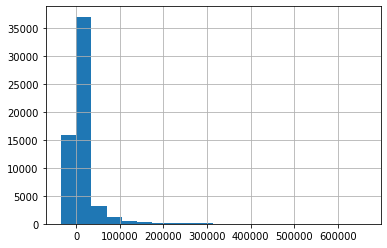

In [57]:
fire_data['acres'].hist(bins=20)